# <font color='0C2054'> <b> Librerías

In [1]:
import pandas as pd
import sqlite3 as sql
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.tree import export_text
from sklearn.preprocessing import LabelEncoder
import sys
import matplotlib.pyplot as plt
import joblib

In [40]:
## Conectar el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <font color='0C2054'> <b> Base 2016

In [2]:
d2016 = pd.read_csv("https://raw.githubusercontent.com/auramolina/Analitica-en-recursos-humanos/main/Datos/df_2016")
d2016.sort_values(by=['EmployeeID'],ascending=1)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementDate,Attrition:1,retirementDate:1,retirementType:1,resignationReason:1
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,...,3.0,4.0,2.0,3,3,NaN,NaN,NaN,NaN,NaN
2,32,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,...,2.0,2.0,1.0,3,3,NaN,NaN,NaN,NaN,NaN
3,38,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,...,4.0,4.0,3.0,2,3,NaN,NaN,NaN,NaN,NaN
4,32,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,...,4.0,1.0,3.0,3,3,NaN,NaN,NaN,NaN,NaN
5,46,Travel_Rarely,Research & Development,8,3,Life Sciences,6,Female,4,Research Director,...,3.0,2.0,2.0,3,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,29,Travel_Rarely,Research & Development,7,1,Life Sciences,8792,Female,1,Research Scientist,...,3.0,4.0,2.0,3,4,NaN,NaN,NaN,NaN,NaN
4386,33,Travel_Rarely,Sales,11,4,Marketing,8797,Male,1,Research Scientist,...,3.0,4.0,1.0,2,4,NaN,NaN,NaN,NaN,NaN
4388,33,Travel_Rarely,Sales,1,3,Life Sciences,8799,Male,2,Manager,...,1.0,1.0,4.0,3,3,NaN,NaN,NaN,NaN,NaN
4391,32,Travel_Rarely,Sales,23,1,Life Sciences,8802,Male,3,Healthcare Representative,...,4.0,3.0,1.0,3,3,NaN,NaN,NaN,NaN,NaN


In [3]:
d2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeID               4410 non-null   int64  
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

## <font color='0C2054'> Duplicados

In [4]:
display(d2016[d2016.duplicated(keep='last')])
display(d2016[d2016.duplicated(keep='first')])

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementDate,Attrition:1,retirementDate:1,retirementType:1,resignationReason:1


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementDate,Attrition:1,retirementDate:1,retirementType:1,resignationReason:1


##<font color='0C2054'>Eliminación de columnas</font>
Se descartan las variables que no aportan información relevante.

In [5]:
# Drop a variables no necesarias
d2016 = d2016.drop(['InfoDate', 'retirementDate','Attrition:1', 'retirementDate:1','retirementType:1','resignationReason:1'], axis=1)
d2016.shape

(4410, 25)

# <font color='0C2054'> <b>  Base 2015

In [6]:
d2015 = pd.read_csv("https://raw.githubusercontent.com/auramolina/Analitica-en-recursos-humanos/main/Datos/df_2015")
d2015.sort_values(by=['EmployeeID'],ascending=1)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementDate,Attrition_Yes,retirementType_Fired,retirementType_Resignation,resignationReason_Others,resignationReason_Salary,resignationReason_Stress
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,...,2.0,3,3,NaN,False,False,False,False,False,False
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,...,4.0,2,4,2016-10-15 00:00:00,True,False,True,True,False,False
2,32,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,...,1.0,3,3,NaN,False,False,False,False,False,False
3,38,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,...,3.0,2,3,NaN,False,False,False,False,False,False
4,32,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,...,3.0,3,3,NaN,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,29,Travel_Rarely,Research & Development,7,1,Life Sciences,8792,Female,1,Research Scientist,...,2.0,3,4,NaN,False,False,False,False,False,False
4386,33,Travel_Rarely,Sales,11,4,Marketing,8797,Male,1,Research Scientist,...,1.0,2,4,NaN,False,False,False,False,False,False
4388,33,Travel_Rarely,Sales,1,3,Life Sciences,8799,Male,2,Manager,...,4.0,3,3,NaN,False,False,False,False,False,False
4391,32,Travel_Rarely,Sales,23,1,Life Sciences,8802,Male,3,Healthcare Representative,...,1.0,3,3,NaN,False,False,False,False,False,False


In [7]:
d2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         4410 non-null   int64  
 1   BusinessTravel              4410 non-null   object 
 2   Department                  4410 non-null   object 
 3   DistanceFromHome            4410 non-null   int64  
 4   Education                   4410 non-null   int64  
 5   EducationField              4410 non-null   object 
 6   EmployeeID                  4410 non-null   int64  
 7   Gender                      4410 non-null   object 
 8   JobLevel                    4410 non-null   int64  
 9   JobRole                     4410 non-null   object 
 10  MaritalStatus               4410 non-null   object 
 11  MonthlyIncome               4410 non-null   int64  
 12  NumCompaniesWorked          4391 non-null   float64
 13  PercentSalaryHike           4410 

## <font color='0C2054'> Duplicados

In [8]:
display(d2015[d2015.duplicated(keep='last')])
display(d2015[d2015.duplicated(keep='first')])

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementDate,Attrition_Yes,retirementType_Fired,retirementType_Resignation,resignationReason_Others,resignationReason_Salary,resignationReason_Stress


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,...,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementDate,Attrition_Yes,retirementType_Fired,retirementType_Resignation,resignationReason_Others,resignationReason_Salary,resignationReason_Stress


## <font color='0C2054'> Nulos

In [9]:
d2015.isnull().sum()

,0
Age,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeID,0
Gender,0
JobLevel,0
JobRole,0


In [10]:
#Función para imputar datos nulos

def imp_datos (df, variables):
    for variable in variables:
        # Calcula la moda de la variable
        moda = df[variable].mode()[0]  # Selecciona el primer valor de la moda en caso de que haya múltiples modas
        # Imputa los valores nulos con la moda
        df[variable].fillna(moda, inplace=True)
        # Imprime información sobre los valores nulos imputados
        nulos_imputados = df[variable].isnull().sum()
    # Devuelve el DataFrame modificado
    return df

# imputar datos nulos para NumCompaniesWorked, TotalWorkingYears, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance
d2015 = imp_datos(d2015, ['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance'])

In [11]:
#observar si ya no quedan nulos
d2015.isnull().sum()

,0
Age,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeID,0
Gender,0
JobLevel,0
JobRole,0


##<font color='0C2054'>Eliminación de columnas</font>
Se descartan las variables que no aportan información relevante. Se eliminan las fechas de información y de retiro.

In [12]:
## Se eliminan las variables que no se necesitan o no aportan
d2015 = d2015.drop(['InfoDate', 'retirementDate'], axis=1)

## <font color='0C2054'> Booleanos </font>
Se convierte la variable objetivo de *bool* a *object*.

In [13]:
# Convertir los boleanos a enteros
# True = 1
#False
d2015['Attrition_Yes'] = d2015['Attrition_Yes'].astype(object)

In [14]:
d2015[d2015.select_dtypes(include='bool').columns] = d2015.select_dtypes(include='bool').astype(int)

In [15]:
d2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         4410 non-null   int64  
 1   BusinessTravel              4410 non-null   object 
 2   Department                  4410 non-null   object 
 3   DistanceFromHome            4410 non-null   int64  
 4   Education                   4410 non-null   int64  
 5   EducationField              4410 non-null   object 
 6   EmployeeID                  4410 non-null   int64  
 7   Gender                      4410 non-null   object 
 8   JobLevel                    4410 non-null   int64  
 9   JobRole                     4410 non-null   object 
 10  MaritalStatus               4410 non-null   object 
 11  MonthlyIncome               4410 non-null   int64  
 12  NumCompaniesWorked          4410 non-null   float64
 13  PercentSalaryHike           4410 

## <font color='0C2054'> Target </font>
**Deserción**

In [16]:
# Target value counts
conteo = d2015['Attrition_Yes'].value_counts()

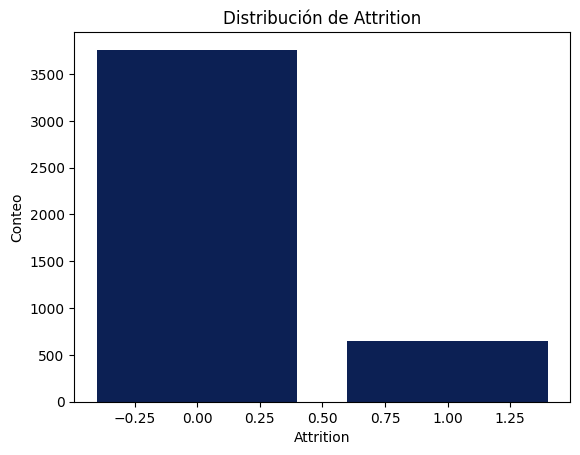

In [17]:
# Gráfica distribución de Target
plt.bar(conteo.index, conteo.values, color='#0C2054')
plt.title('Distribución de Attrition')
plt.xlabel('Attrition')
plt.ylabel('Conteo')
plt.show()

Se observa un desequilibrio significativo en la variable objetivo, con un 85,26 % de empleados marcados como "False" en deserción, lo que indica que se quedaron, mientras que solo el 17,74 % están marcados como "True", lo que indica que se fueron. Este desequilibrio muestra que la mayoría de los empleados tienden a quedarse en la empresa, lo que podría influir en las predicciones del modelo y requerir un manejo para una mayor precisión.

# <font color='0C2054'> <b>  Exploración variables númericas </font></b>
* Los empleados se encuentran entre los 18 a 60 años de edad, lo que indica personal variado en términos de experiencia.
* El ingreso mensual muestra una variabilidad significativa, ya que algunos empleados ganan tan solo 10 090 mientras que otros ganan hasta 199 999, lo que muestra disparidad en el salario, la cual puede estar influenciada por factores como el puesto de trabajo, el nivel y la antigüedad.
* Los años en la empresa también varían considerablemente, ya que algunos empleados son nuevos empleados (0 años) y otros tienen hasta 40 años de antigüedad.

## <font color='0C2054'> Descripción

In [18]:
d2015.describe()

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,retirementType_Fired,retirementType_Resignation,resignationReason_Others,resignationReason_Salary,resignationReason_Stress
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,2266.500000,2.063946,65029.312925,2.687528,15.209524,0.793878,11.277324,...,2.725170,2.734014,2.763492,2.729932,3.153741,0.014739,0.132653,0.067120,0.039229,0.026304
std,9.133301,8.105026,1.023933,1459.625988,1.106689,47068.888559,2.495967,3.659108,0.851883,7.774490,...,1.089852,1.102071,0.703541,0.711400,0.360742,0.120521,0.339238,0.250258,0.194161,0.160056
min,18.000000,1.000000,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1103.250000,1.000000,29110.000000,1.000000,12.000000,0.000000,6.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,7.000000,3.000000,2205.500000,2.000000,49190.000000,2.000000,14.000000,1.000000,10.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,14.000000,4.000000,3307.750000,3.000000,83800.000000,4.000000,18.000000,1.000000,15.000000,...,4.000000,4.000000,3.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,60.000000,29.000000,5.000000,8813.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,40.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## <font color='0C2054'> Correlación </font>

<Axes: >

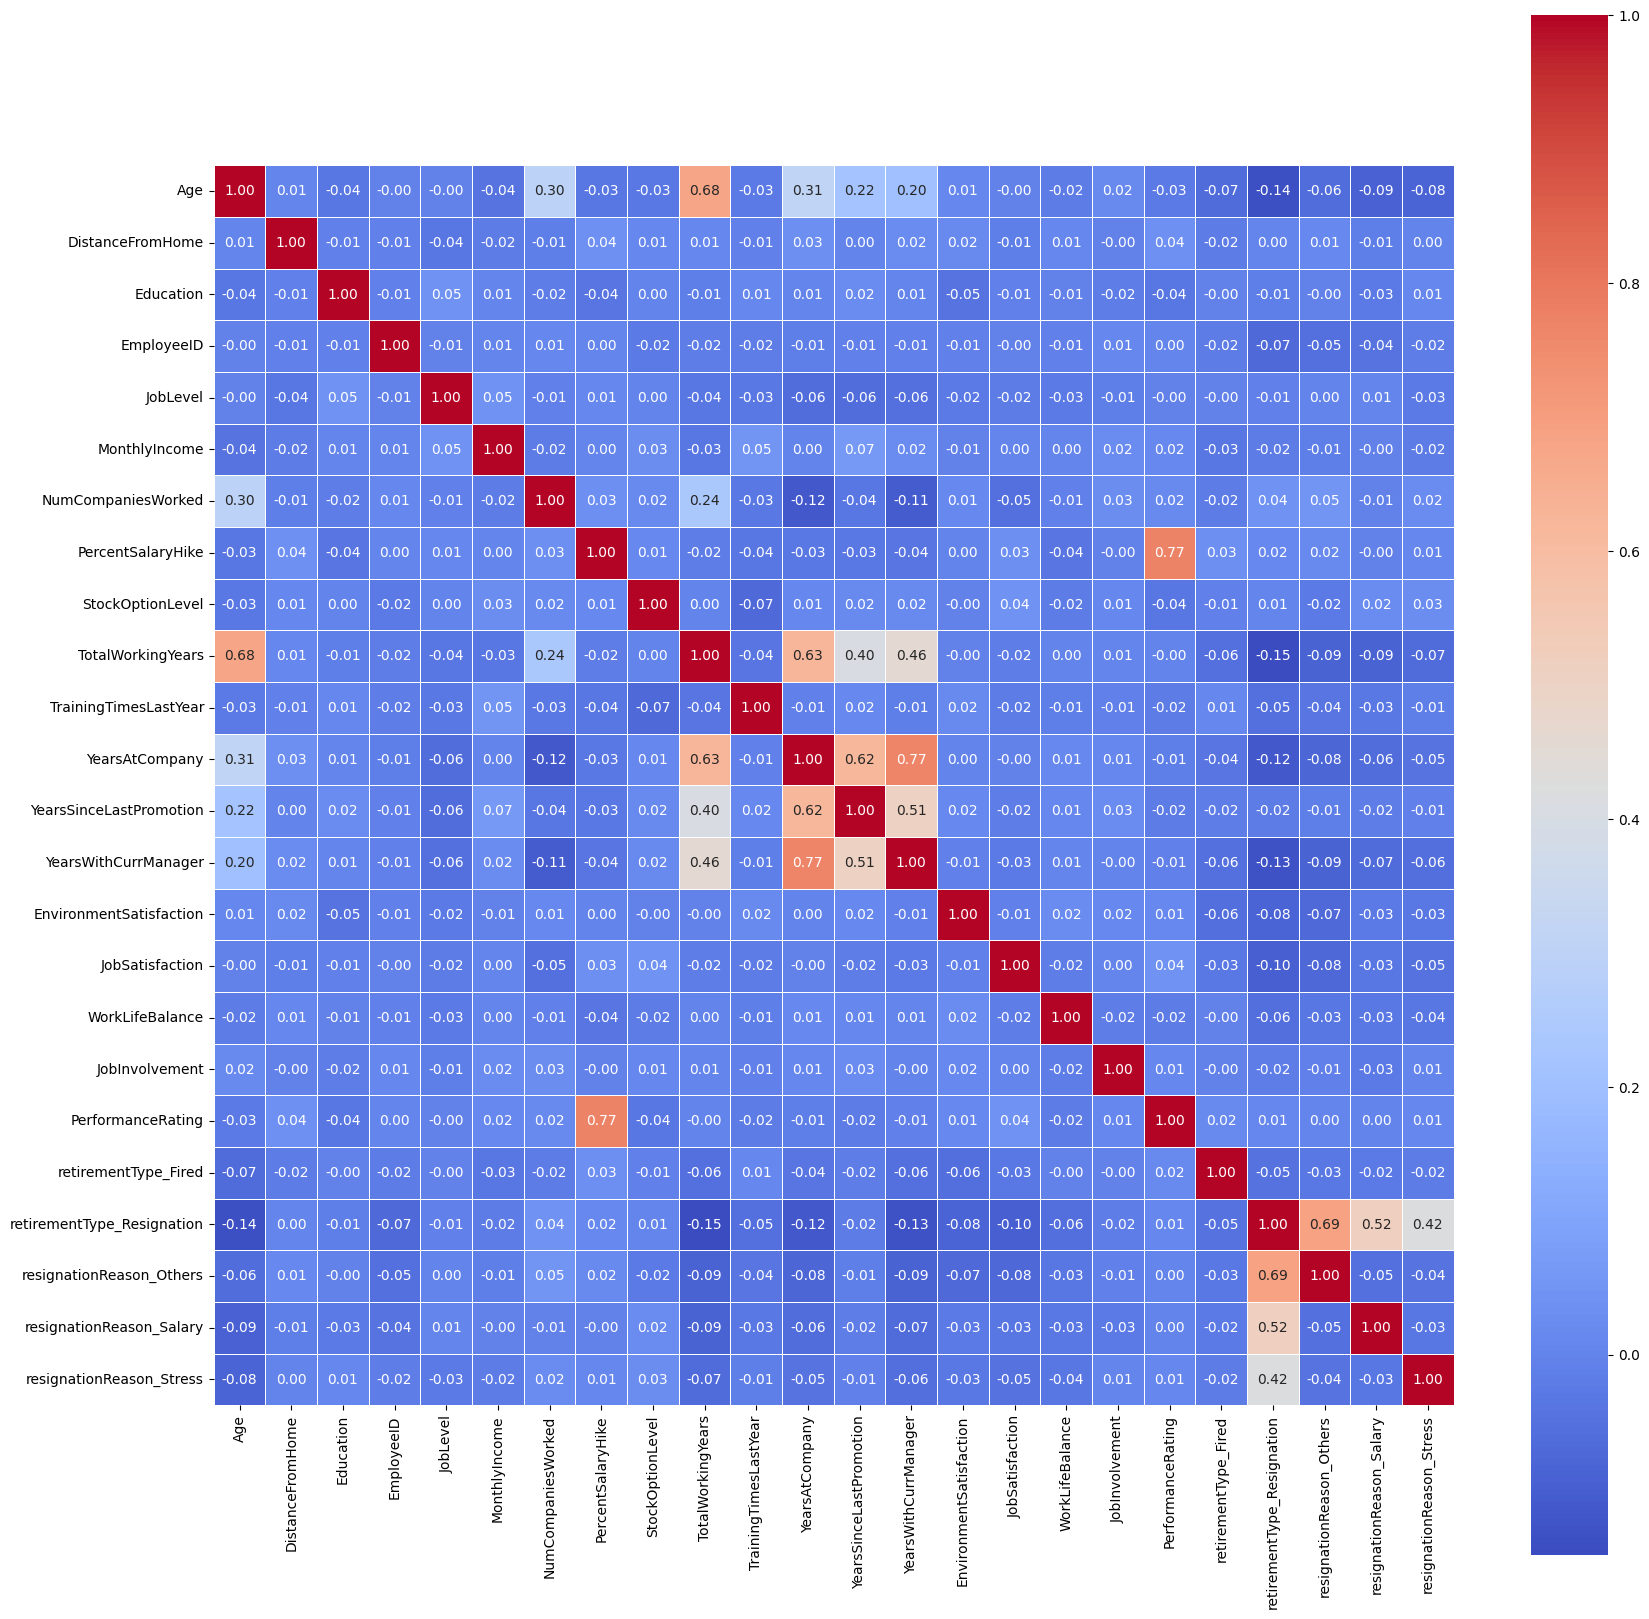

In [19]:
nc = d2015.select_dtypes(include=[np.number])
plt.figure(figsize=(20, 20))
sns.heatmap(nc.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=.5)

## <font color='0C2054'> Histograma

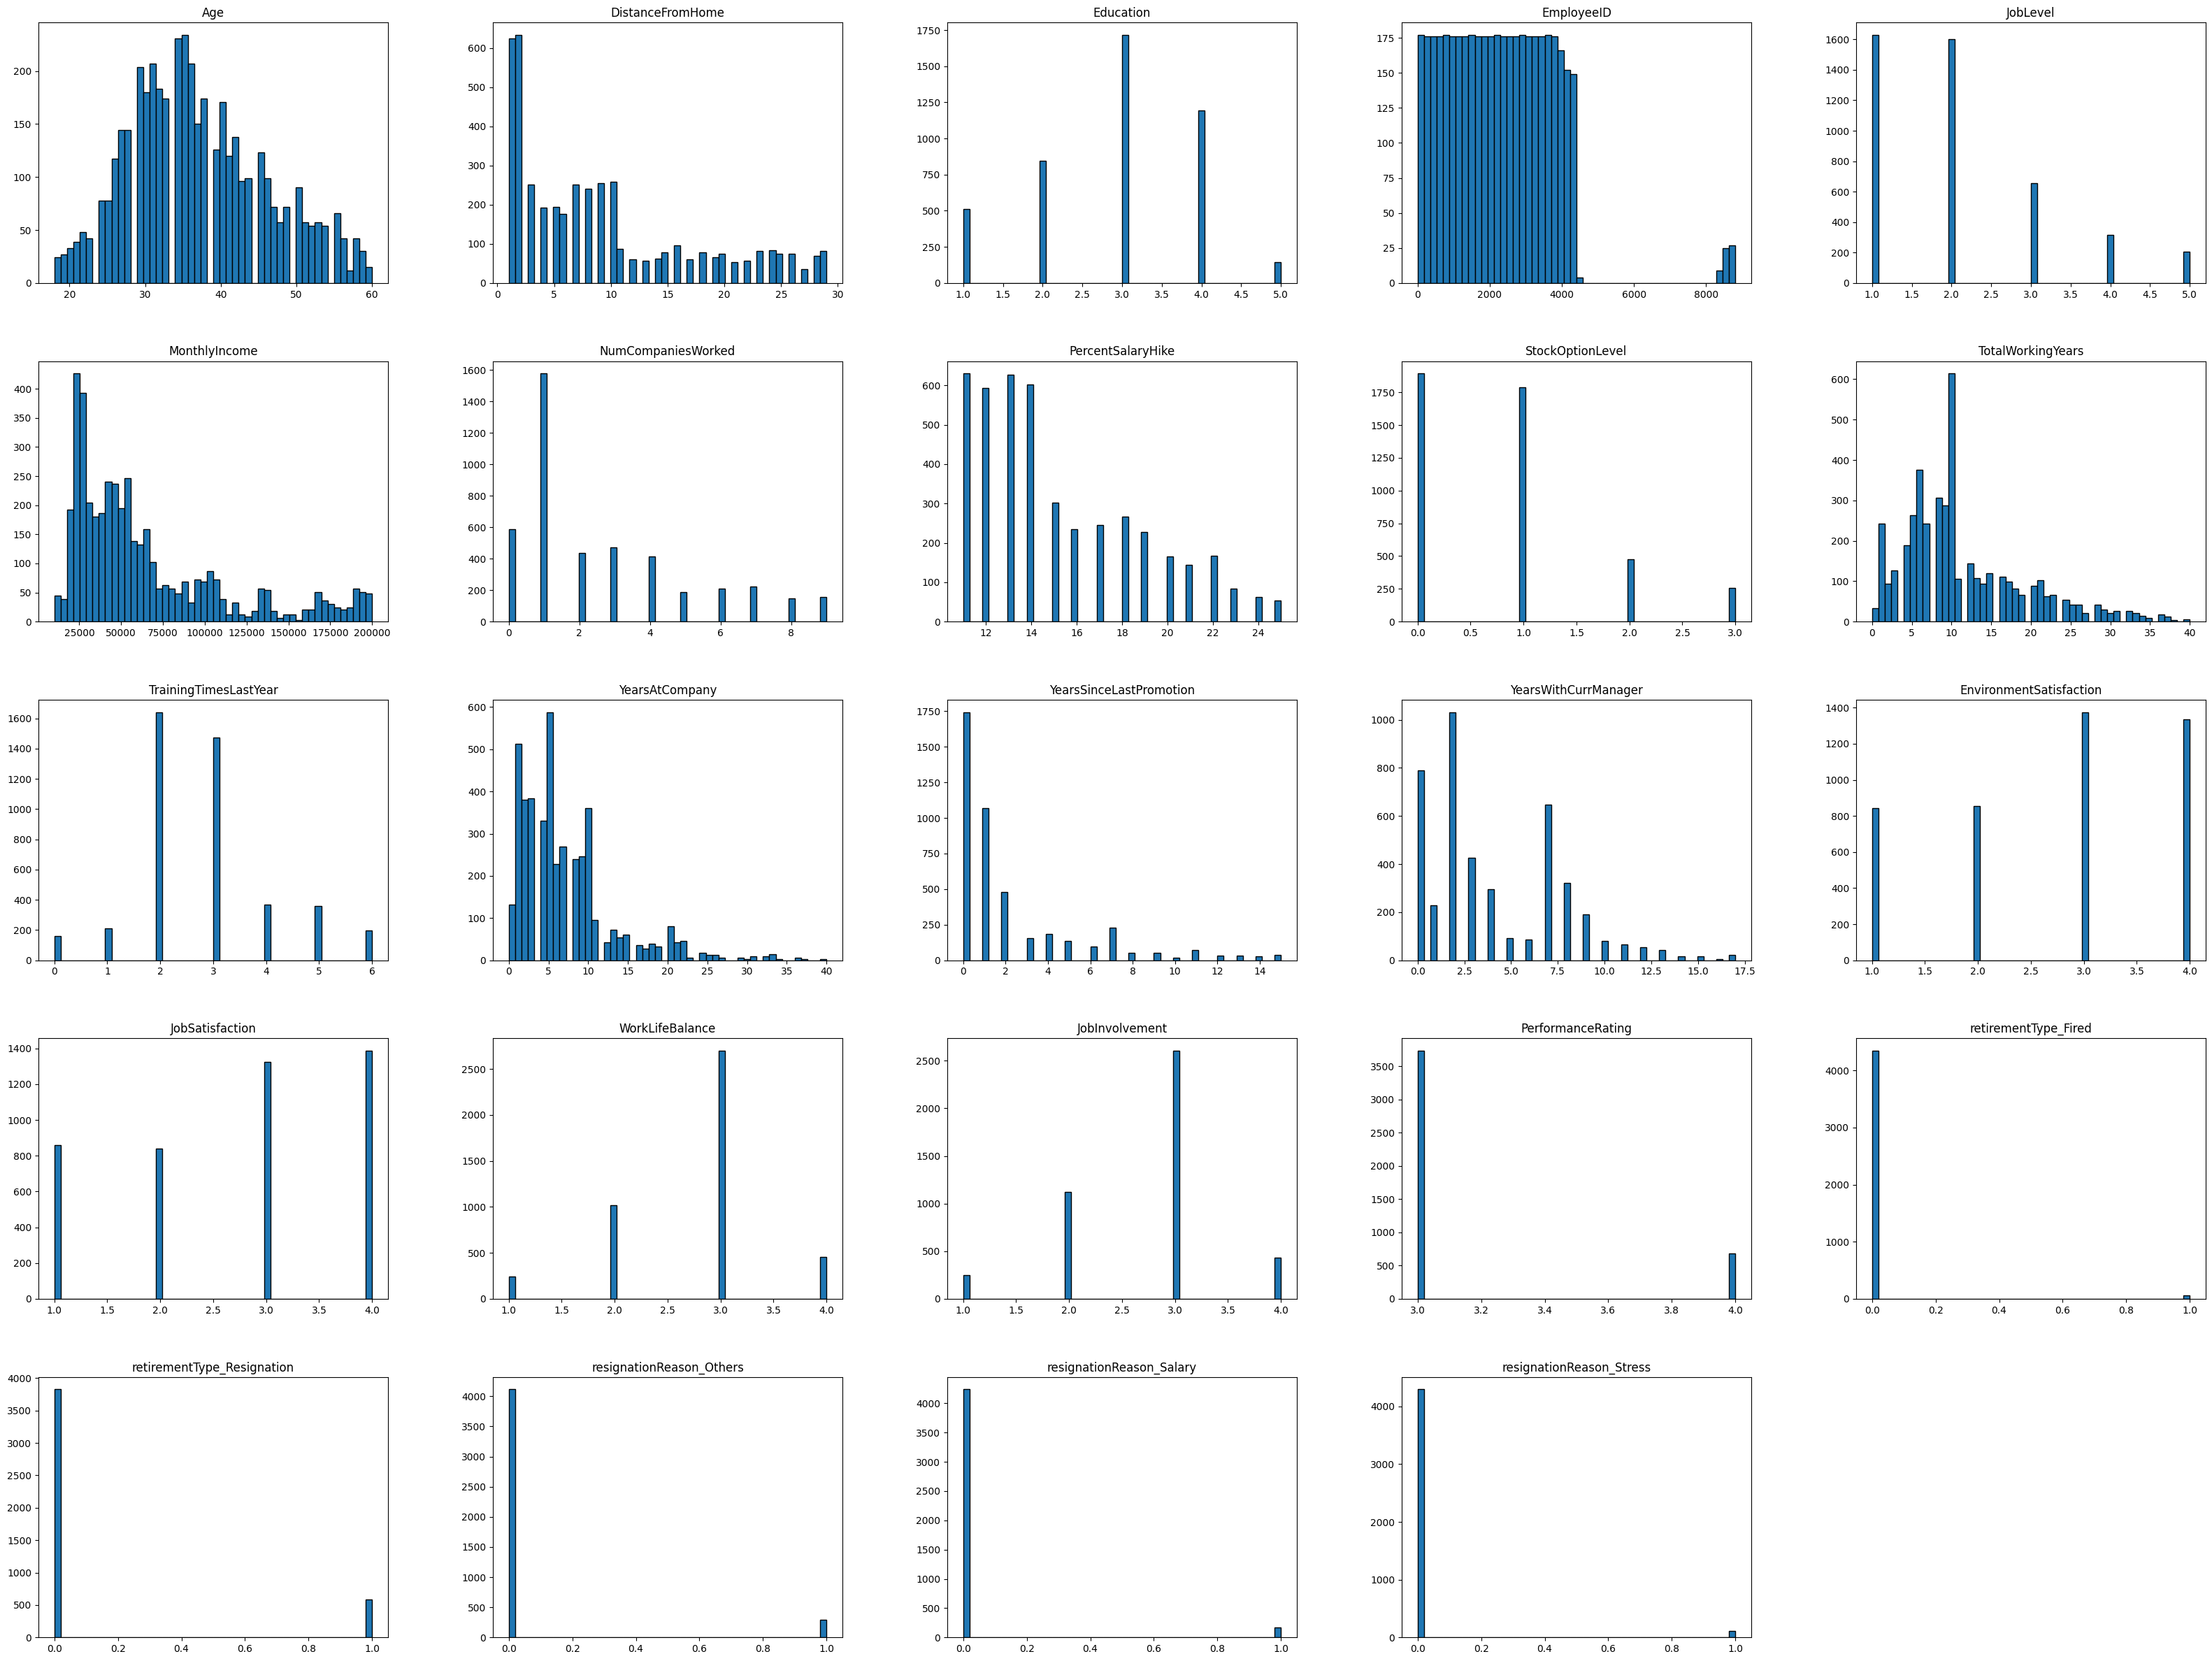

In [20]:
# Explorar variables numéricas con histograma
fig=nc.hist(bins=50, figsize=(40,30),grid=False,ec='black')
plt.show()

# <font color='0C2054'> <b> Análisis variables categóricas

## <font color='0C2054'> Descripción

In [21]:
d2015.describe(include="object")

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Attrition_Yes
count,4410,4410,4410,4410,4410,4410,4410
unique,3,3,6,2,9,3,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,False
freq,3129,2883,1818,2646,978,2019,3760


In [22]:
cc = d2015.select_dtypes(include=['object'])

#resumen de las variables categoricas para observar el balanceo de las categoricas

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        plt.figure(figsize=(12,6))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

cat_cols = [col for col in cc.columns if cc[col].dtypes == "O"]
for col in cat_cols:
    cat_summary(cc, col, plot=False)

                   BusinessTravel      Ratio
BusinessTravel                              
Travel_Rarely                3129  70.952381
Travel_Frequently             831  18.843537
Non-Travel                    450  10.204082
##########################################
                        Department      Ratio
Department                                   
Research & Development        2883  65.374150
Sales                         1338  30.340136
Human Resources                189   4.285714
##########################################
                  EducationField      Ratio
EducationField                             
Life Sciences               1818  41.224490
Medical                     1392  31.564626
Marketing                    477  10.816327
Technical Degree             396   8.979592
Other                        246   5.578231
Human Resources               81   1.836735
##########################################
        Gender  Ratio
Gender               
Male      2646   60.

## <font color='0C2054'> Gráficas

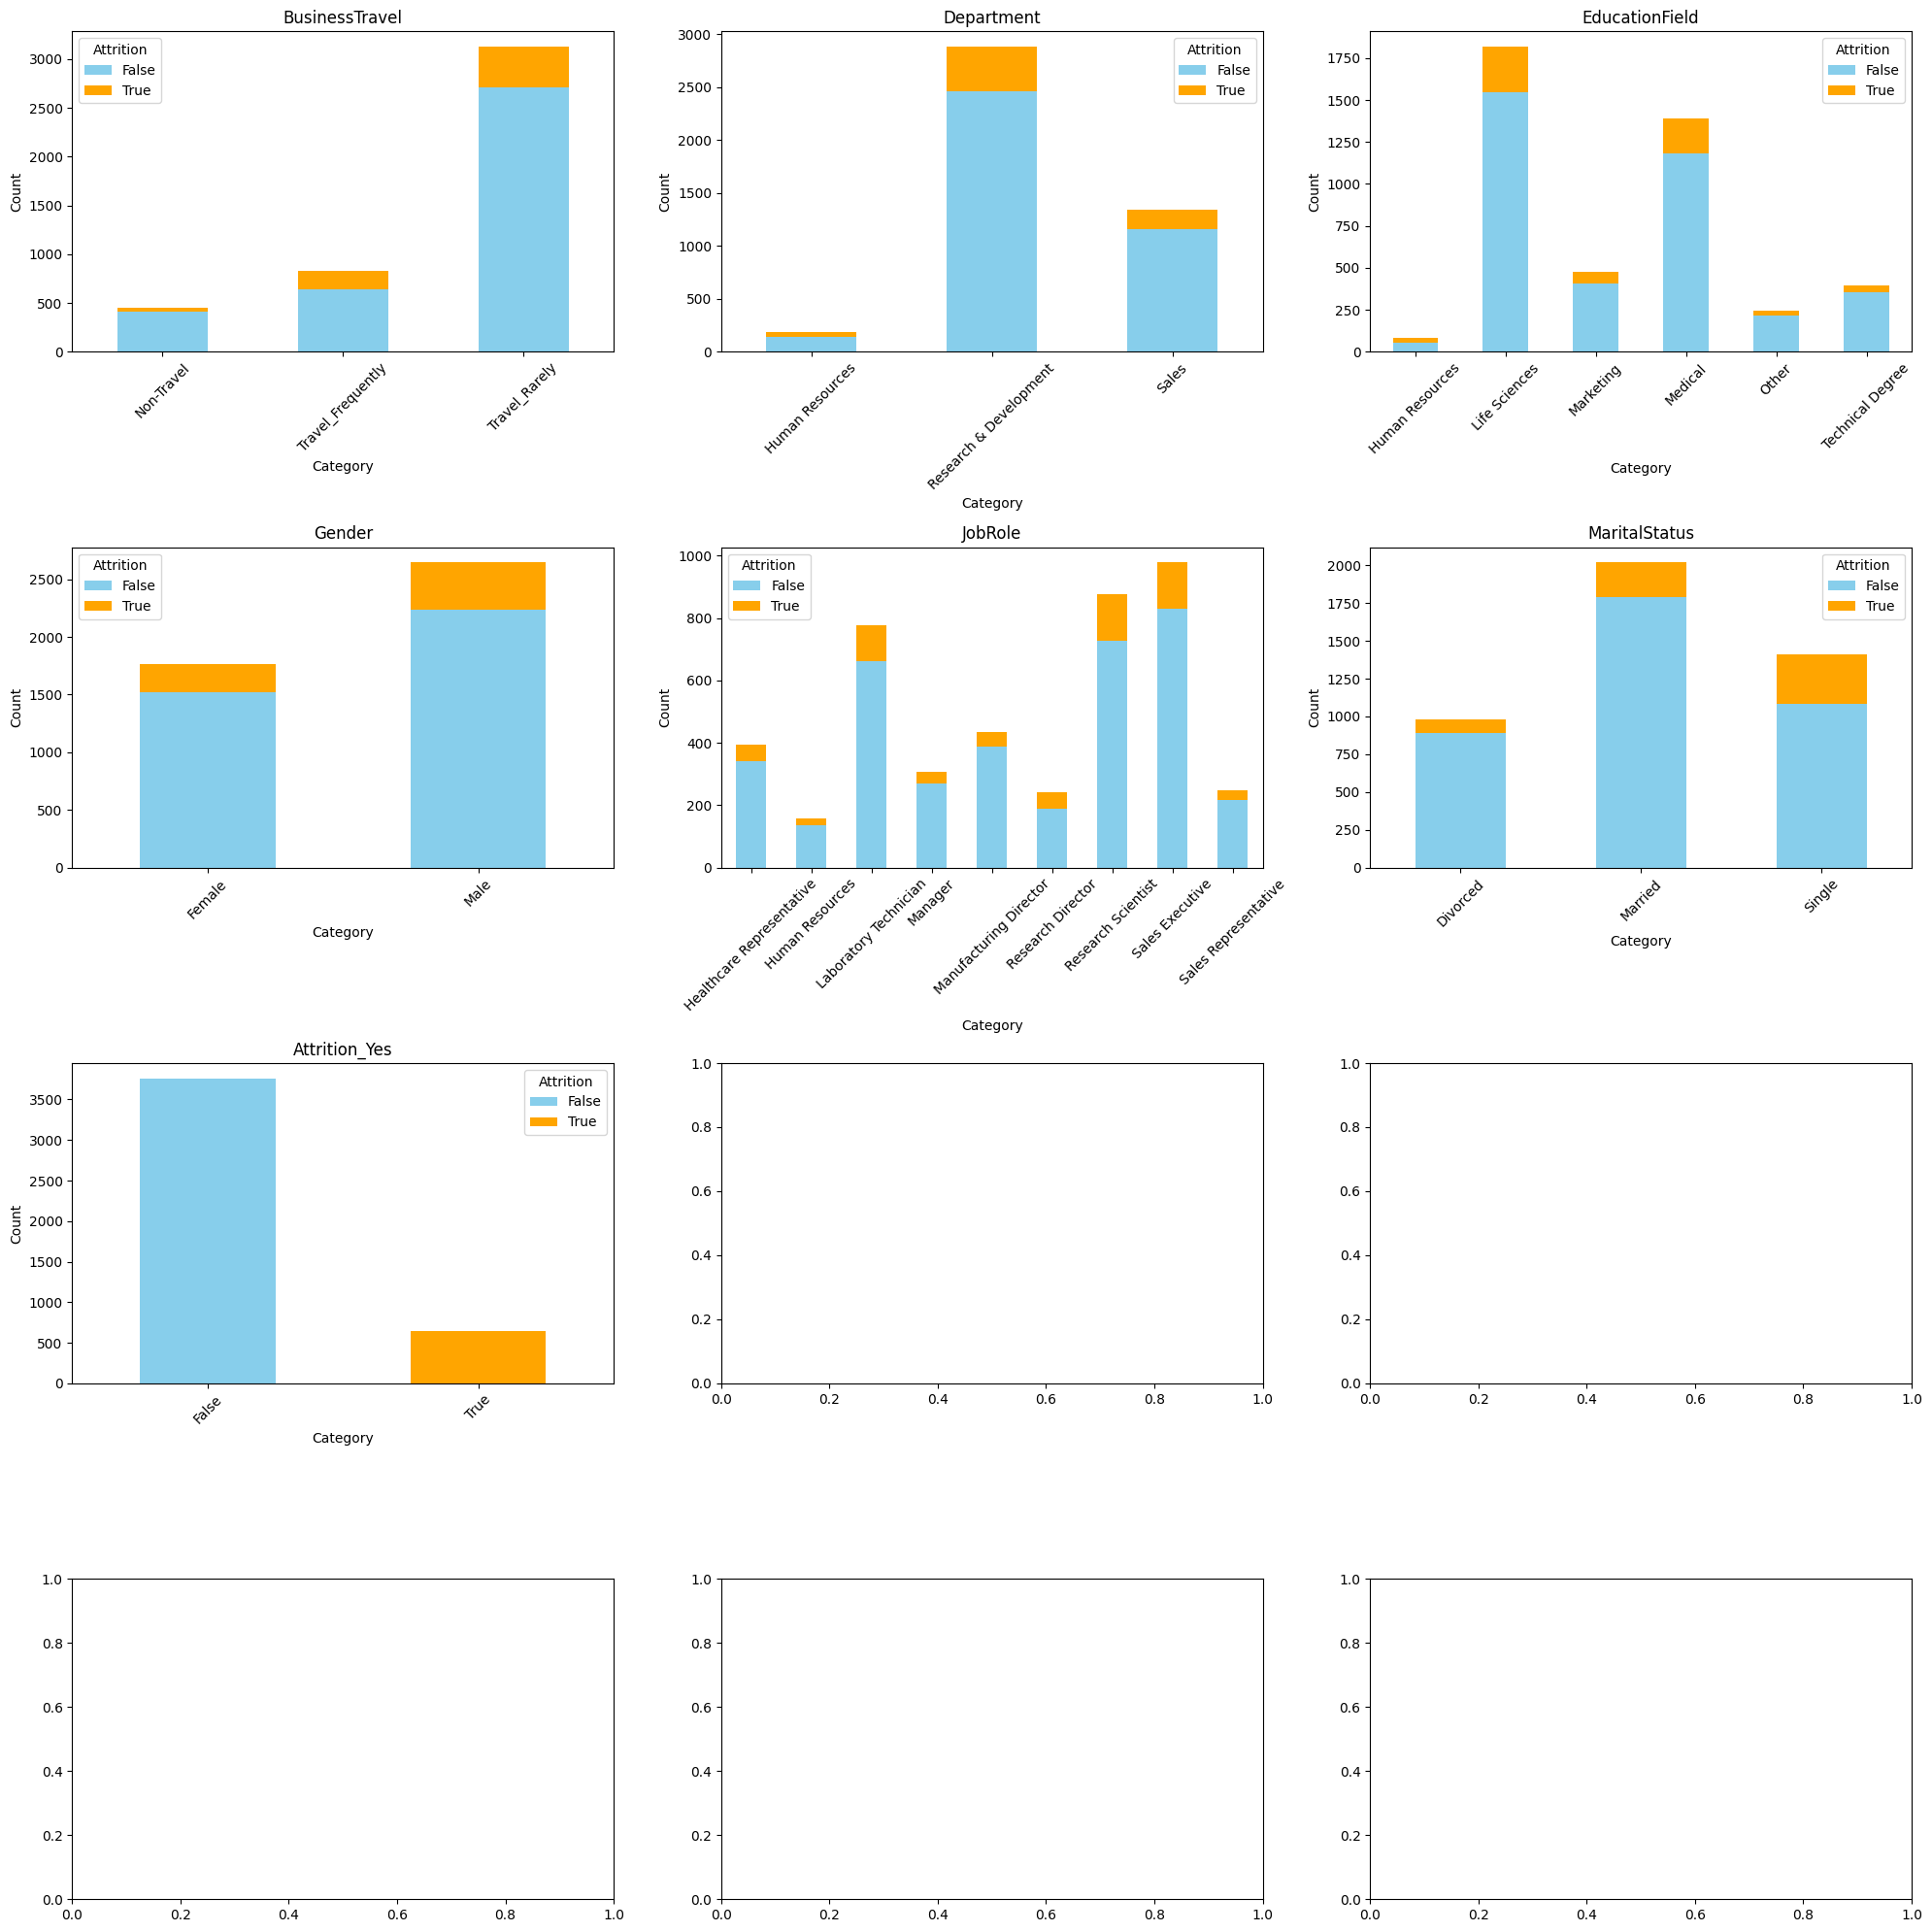

In [23]:
# Graficos para la comparación de las variables categoricas

# Definir el número de filas y columnas para los subplots
num_rows = 4
num_cols = 3

# Crear una figura y ejes de subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Aplanar los ejes de los subplots para facilitar el bucle
axes = axes.flatten()

# Iterar sobre las variables categóricas y trazar gráficos de barras apiladas
for i, col in enumerate(cc.columns):
    ax = axes[i]
    crosstab = pd.crosstab(cc[col], d2015['Attrition_Yes'])
    crosstab.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'orange'])
    ax.set_title(col)
    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    ax.legend(title='Attrition')

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

#<font color='0C2054'><b>Conversión a dummies</font></b>

## <font color='0C2054'>2015</font>

In [24]:
# Se crea copia al df
dummies2015 = d2015.copy()

In [25]:
# Se dentifican las variables categóricas
cat_2015 = dummies2015.select_dtypes(include=['object']).columns

# Iterar a través de las columnas categóricas y mostrar las categorías únicas
for column in cat_2015:
    unique_categories = dummies2015[column].unique()
    print(f'Categorías en "{column}": {unique_categories}')

Categorías en "BusinessTravel": ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Categorías en "Department": ['Sales' 'Research & Development' 'Human Resources']
Categorías en "EducationField": ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Categorías en "Gender": ['Female' 'Male']
Categorías en "JobRole": ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
Categorías en "MaritalStatus": ['Married' 'Single' 'Divorced']
Categorías en "Attrition_Yes": [False True]


In [26]:
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Iterar a través de las columnas categóricas y aplicar LabelEncoder si hay 2 categorías
for column in cat_2015:
    if len(dummies2015[column].unique()) == 2:  # Verificar si hay solo 2 categorías
       dummies2015[column] = le.fit_transform(dummies2015[column])

# Variables con mas de 2 categorias
dummies_2015 = pd.get_dummies(dummies2015)

In [27]:
dummies_2015

,Age,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,1,0,1,131160,1.0,11,0,...,False,False,False,False,False,False,False,False,True,False
1,31,10,1,2,0,1,41890,0.0,23,1,...,False,False,False,False,True,False,False,False,False,True
2,32,17,4,3,1,4,193280,1.0,15,3,...,False,False,False,False,False,True,False,False,True,False
3,38,2,5,4,1,3,83210,3.0,11,3,...,False,False,False,False,False,False,False,False,True,False
4,32,10,1,5,1,1,23420,4.0,12,2,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,4406,0,1,60290,3.0,17,1,...,False,False,False,False,True,False,False,False,False,True
4406,29,2,4,4407,1,1,26790,2.0,15,0,...,True,False,False,False,False,False,False,True,False,False
4407,25,25,2,4408,1,2,37020,0.0,20,0,...,False,False,False,False,False,True,False,False,True,False
4408,42,18,2,4409,1,1,23980,0.0,14,1,...,True,False,False,False,False,False,False,True,False,False


## <font color='0C2054'>2016</font>

In [31]:
# Se crea copia al df
dummies2016 = d2016.copy()

In [32]:
# Se dentifican las variables categóricas
cat_2016 = dummies2016.select_dtypes(include=['object']).columns

# Iterar a través de las columnas categóricas y mostrar las categorías únicas
for column in cat_2016:
    unique_categories = dummies2016[column].unique()
    print(f'Categorías en "{column}": {unique_categories}')

Categorías en "BusinessTravel": ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Categorías en "Department": ['Sales' 'Research & Development' 'Human Resources']
Categorías en "EducationField": ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Categorías en "Gender": ['Female' 'Male']
Categorías en "JobRole": ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
Categorías en "MaritalStatus": ['Married' 'Single' 'Divorced']


In [37]:
# Crear un objeto LabelEncoder
le = LabelEncoder()

# Iterar a través de las columnas categóricas y aplicar LabelEncoder si hay 2 categorías
for column in cat_2016:
    if len(dummies2016[column].unique()) == 2:  # Verificar si hay solo 2 categorías
       dummies2015[column] = le.fit_transform(dummies2016[column])

# Variables con mas de 2 categorias
dummies_2016 = pd.get_dummies(dummies2016)

In [38]:
dummies_2016

,Age,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,6,2,1,1,131160,1.0,11,0,1.0,...,False,False,False,False,False,False,False,False,True,False
1,31,10,1,4412,1,41890,0.0,23,1,6.0,...,False,False,False,False,True,False,False,False,False,True
2,32,17,4,3,4,193280,1.0,15,3,5.0,...,False,False,False,False,False,True,False,False,True,False
3,38,2,5,4,3,83210,3.0,11,3,13.0,...,False,False,False,False,False,False,False,False,True,False
4,32,10,1,5,1,23420,4.0,12,2,9.0,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,4406,1,60290,3.0,17,1,10.0,...,False,False,False,False,True,False,False,False,False,True
4406,29,2,4,4407,1,26790,2.0,15,0,10.0,...,True,False,False,False,False,False,False,True,False,False
4407,25,25,2,4408,2,37020,0.0,20,0,5.0,...,False,False,False,False,False,True,False,False,True,False
4408,42,18,2,4409,1,23980,0.0,14,1,10.0,...,True,False,False,False,False,False,False,True,False,False


#<font color='0C2054'><b>Exportación</font></b>

In [41]:
## Se exportan los DataFrame a archivos csv
dummies_2015.to_csv('/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/Datos/dummies2015', index=False)
dummies_2016.to_csv('/content/drive/MyDrive/AA/Analitica-en-recursos-humanos/Datos/dummies2016', index=False)